# Toy Datasets

Spravime si generatory dat, nad ktorymi budeme vypracovavat demonstracie.

## Circle dataset

Vygenerujeme vzorky s dvoma hodnotami (nx=2), ktore budeme klasifikovat do 2 tried, podla toho, ci ich vzdialenost od stredu je vacsia ako hranicny polomer r.


In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [45]:
def dataset_Circles(m=10, radius=0.7, noise=0.0, verbose=False):

    # Hodnoty X budu v intervale <-1; 1>
    X = (np.random.rand(2, m) * 2.0) - 1.0
    if (verbose): print('X: \n', X, '\n')

    # Element-wise nasobenie nahodnym sumom
    N = (np.random.rand(2, m)-0.5) * noise
    if (verbose): print('N: \n', N, '\n')
    Xnoise = X + N
    if (verbose): print('Xnoise: \n', Xnoise, '\n')

    # Spocitame polomer
    # Element-wise druha mocnina
    XSquare = Xnoise ** 2
    if (verbose): print('XSquare: \n', XSquare, '\n')

    # Spocitame podla prvej osi. Ziskame (1, m) array.
    RSquare = np.sum(XSquare, axis=0, keepdims=True)
    if (verbose): print('RSquare: \n', RSquare, '\n')
    R = np.sqrt(RSquare)
    if (verbose): print('R: \n', R, '\n')

    # Y bude 1, ak je polomer vacsi ako argument radius
    Y = (R > radius).astype(float)
    if (verbose): print('Y: \n', Y, '\n')

    # Vratime X, Y
    return X, Y


In [46]:
# Spravime ukazkovy dataset
X, Y = dataset_Circles(m=5, radius=0.5, noise=0.0, verbose=True)

# Skusime z X a Y ziskat vlastnosti datasetu
nx, m = X.shape
ny, _ = Y.shape

print('Vlastnosti datasetu: ')
print('  nx = ', nx)
print('  ny = ', ny)
print('  m  = ', m)
print('')


X: 
 [[ 0.47621441 -0.23707498 -0.36583241  0.03391753  0.60929509]
 [ 0.89258719 -0.95819087 -0.9511585  -0.81731624  0.83055113]] 

N: 
 [[-0. -0.  0.  0.  0.]
 [-0.  0. -0.  0. -0.]] 

Xnoise: 
 [[ 0.47621441 -0.23707498 -0.36583241  0.03391753  0.60929509]
 [ 0.89258719 -0.95819087 -0.9511585  -0.81731624  0.83055113]] 

XSquare: 
 [[0.22678017 0.05620454 0.13383335 0.0011504  0.37124051]
 [0.7967119  0.91812975 0.9047025  0.66800583 0.68981519]] 

RSquare: 
 [[1.02349206 0.97433429 1.03853584 0.66915623 1.0610557 ]] 

R: 
 [[1.01167785 0.98708373 1.01908579 0.8180197  1.03007558]] 

Y: 
 [[1. 1. 1. 1. 1.]] 

Vlastnosti datasetu: 
  nx =  2
  ny =  1
  m  =  5



## Vizualizacia datasetu

Je dobre si vediet vizualizovat data, s ktorymi pracujeme. Pouzijeme PyPlot kniznicu a spravime SCATTER graf.

In [32]:
def draw_Scatter(X, Y):

    # 9 x 9 palcovy obrazok s linearnou mierkou
    plt.figure(figsize=(9, 9))
    plt.xscale('linear')
    plt.yscale('linear')

    # Nakreslime scatter graf
    plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.RdBu)
    plt.show()
    plt.close()


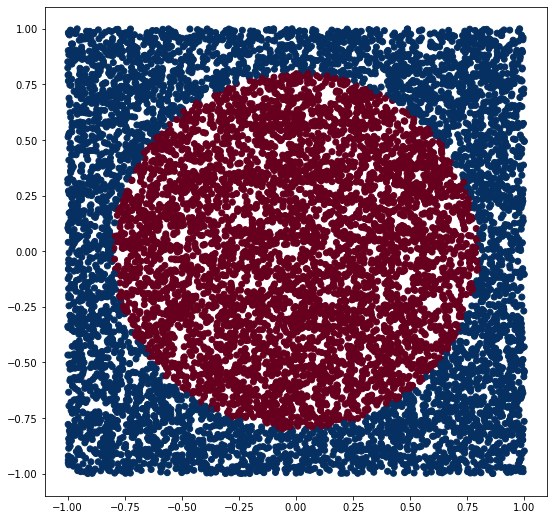

In [52]:
# Spravime ukazkovy dataset a vizualizujeme ho
X, Y = dataset_Circles(m=10000, radius=0.8, noise=0.0, verbose=False)

draw_Scatter(X, Y)

## Kvetinkovy vzor (Flower pattern)

Druhy hrackarsky dataset bude kreslit vzor pripominajuci lupene kvetu.


In [80]:
def dataset_Flower(m=10, noise=0.0):
    # Inicializujeme matice
    X = np.zeros((m, 2), dtype='float')
    Y = np.zeros((m, 1), dtype='float')

    a = 1.0
    pi = 3.141592654
    M = int(m/2)

    for j in range(2):
        ix = range(M*j, M*(j+1))
        t = np.linspace(j*pi, (j+1)*pi, M) + np.random.randn(M)*noise
        r = a*np.sin(4*t) + np.random.randn(M)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T
    return X, Y

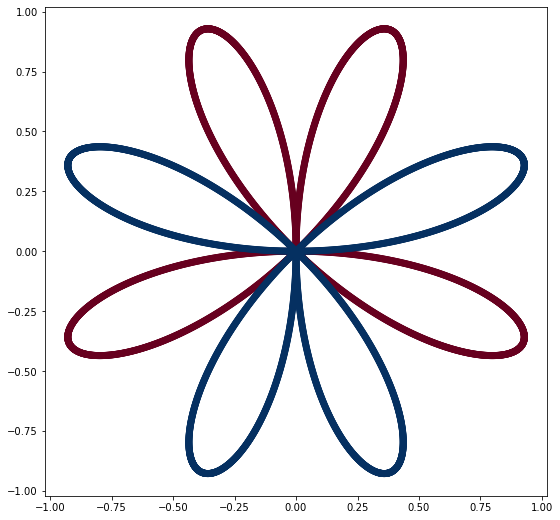

In [81]:
# Ukazka Flower datasetu
X, Y = dataset_Flower(m=5000, noise=0.0)

draw_Scatter(X, Y)